# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [174]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [ ]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head(2)

In [ ]:
#1)
tips = tips[tips.time == 'Dinner']
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
reg_item1 = sm.OLS(y, X).fit()
X

In [ ]:
#2)
reg1 = sm.OLS(y, X).fit()
reg1.summary()

In [ ]:
print(f'Removido sex e smoker por apresentarem valores de P>|t| > 0.05')
y, X = patsy.dmatrices('tip ~ time + net_bill + 1', tips)
reg1 = sm.OLS(y, X).fit()
reg1.summary()

In [ ]:
#3)
tips = tips.copy()
tips['resid'] = reg1.resid
sns.regplot(x = 'net_bill', y = 'resid', data = tips[tips['tip_pct']<.5])
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
#4)

#LOG
y, X = patsy.dmatrices('tip ~ time + np.log(net_bill) + 1', tips)
regLog = sm.OLS(y, X).fit()



#POLINOMIAL
y, X = patsy.dmatrices('tip ~ time + (net_bill + np.power(net_bill,2)) + 1', tips)
regPoli = sm.OLS(y, X).fit()

print('O melhor modelo é o que corresponde ao maior valor de R²')
if regLog.rsquared > regPoli.rsquared:
    print(f'Logarítmica de net_bill: {regLog.rsquared}')
else:
    print(f'Polinomial de net_bill: {regPoli.rsquared}')


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
### ITEMS 1, 2, 3 e 4 dessa sessão já foram feitos acima.
### Apenas a questão 5 foi feita abaixo.

#5)
print(f'Polinomial de net_bill R²: {regPoli.rsquared}\n')
print('O melhor modelo é o que corresponde ao melhor coeficiente de determinação R²')
if reg_item1.rsquared > regPoli.rsquared:
    print(f'Item 1: {reg_item1.rsquared}')
else:
    print(f'Polinomial de net_bill: {regPoli.rsquared}')


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [204]:
df_prev_renda = pd.read_csv('previsao_de_renda.csv')
df_prev_renda = df_prev_renda.dropna()


In [205]:
#1)
reg = smf.ols('renda ~ tempo_emprego', data = df_prev_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:41:36   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

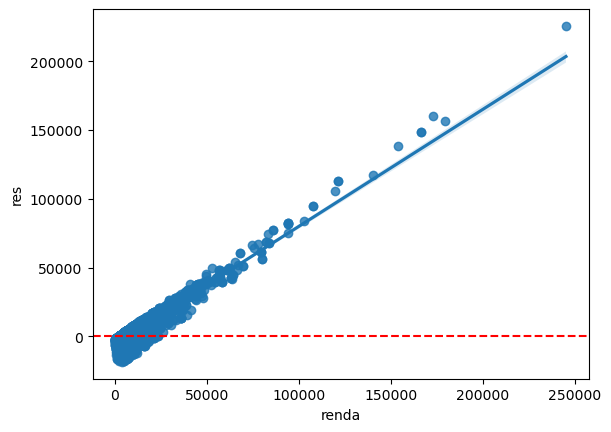

In [206]:
#2)
df_prev_renda['res'] = reg.resid

sns.regplot(x = 'renda', y = 'res', data = df_prev_renda)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

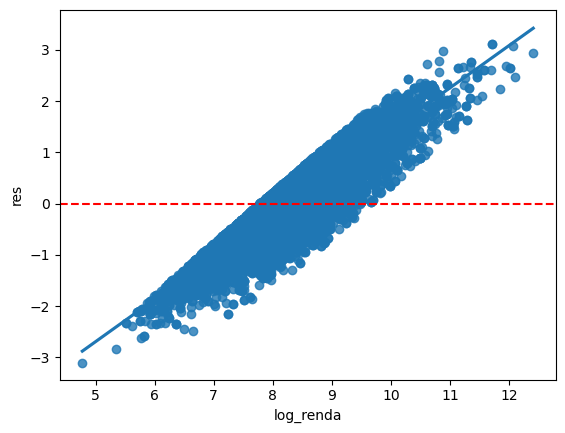

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1312.
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:41:44   Log-Likelihood:                -15125.
No. Observations:               12427   AIC:                         3.026e+04
Df Residuals:                   12424   BIC:                         3.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.7665      0.015    514.262      0.000       7.737       7.796
tempo_emprego                  0.0743      0.003     25.799      0.000       0.069       0.080
np.power(tempo_emprego, 2)    -0.0007   9.95e-05     -7.076      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       28.920   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.103
Skew:                           0.117   Prob(JB):                     4.79e-07
Kurtosis:                       2.961   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:


reg = smf.ols('np.log(renda) ~ tempo_emprego + np.power(tempo_emprego,2)', data = df_prev_renda).fit()

df_prev_renda['res'] = reg.resid
df_prev_renda['log_renda'] = np.log(df_prev_renda['renda'])
sns.regplot(x = 'log_renda', y = 'res', data = df_prev_renda)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
reg.summary()

In [236]:
#3)
itens = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + 1'
y, X = patsy.dmatrices(itens, df_prev_renda)
reg_renda = sm.OLS(y, X).fit()
reg_renda.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:51:41   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

In [234]:
#4)
print('Removido variáveis não significantes')
itens = 'np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego + 1'
y, X = patsy.dmatrices(itens, df_prev_renda)
reg = sm.OLS(y, X).fit()
reg.summary()

Removido variáveis não significantes


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1637.
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:51:25   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.742e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.2790      0.031    233.591      0.000       7.218       7.340
sexo[T.M]                   0.7895      0.014     57.276      0.000       0.762       0.817
posse_de_imovel[T.True]     0.0898      0.014      6.512      0.000       0.063       0.117
idade                       0.0042      0.001      5.635      0.000       0.003       0.006
tempo_emprego               0.0610      0.001     59.110      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

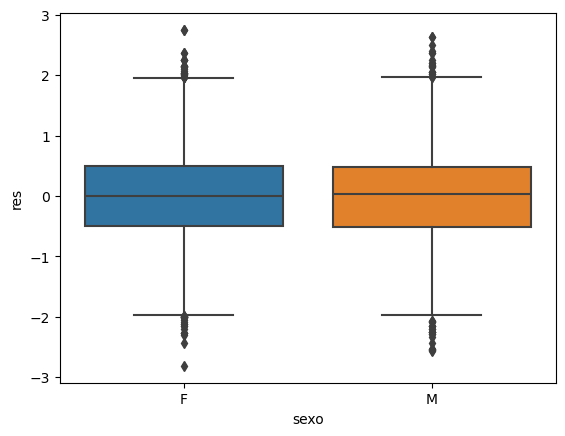

In [237]:
#5)Analisando o resíduo nas variáveis significantes

df_prev_renda['res'] = reg.resid
sns.boxplot(x = 'sexo', y = 'res', data = df_prev_renda);


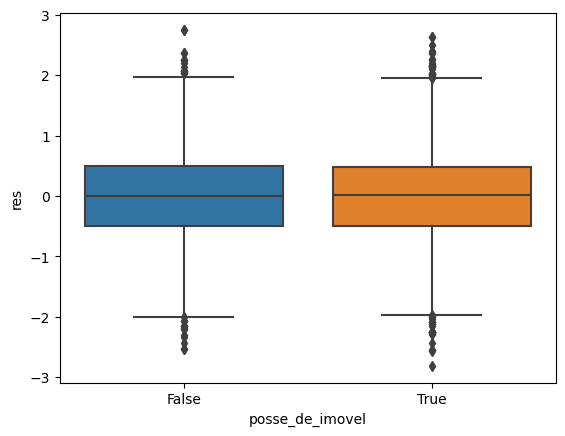

In [238]:
sns.boxplot(x = 'posse_de_imovel', y = 'res', data = df_prev_renda);

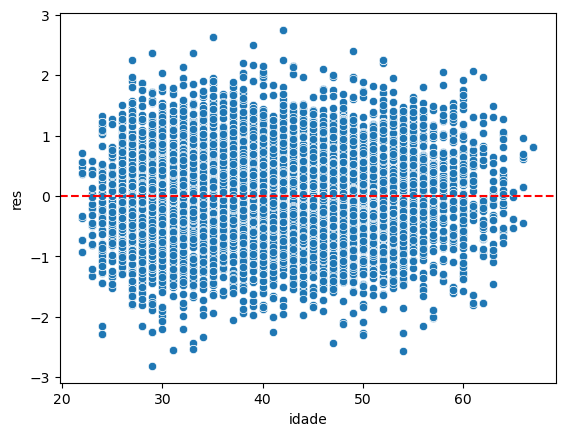

In [248]:
sns.scatterplot(x='idade', y='res', data=df_prev_renda)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

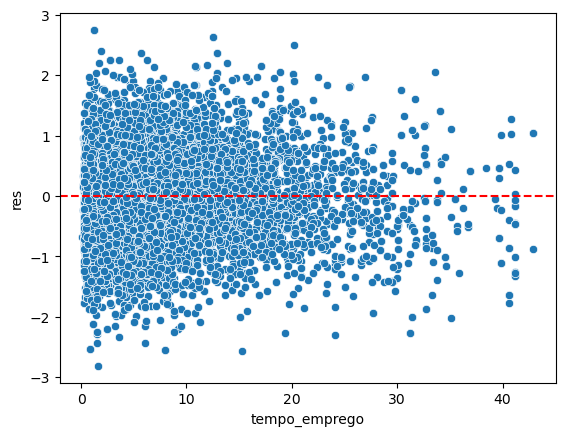

In [250]:
sns.scatterplot(x='tempo_emprego', y='res', data=df_prev_renda)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

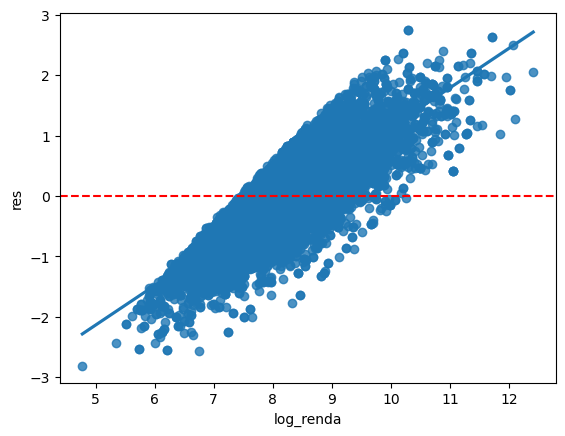

In [251]:
sns.regplot(x = 'log_renda', y = 'res', data = df_prev_renda)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()